<a href="https://colab.research.google.com/github/hemanth714444/2203A52192_DAUP/blob/main/2203A52192.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Processing column: CreditScore



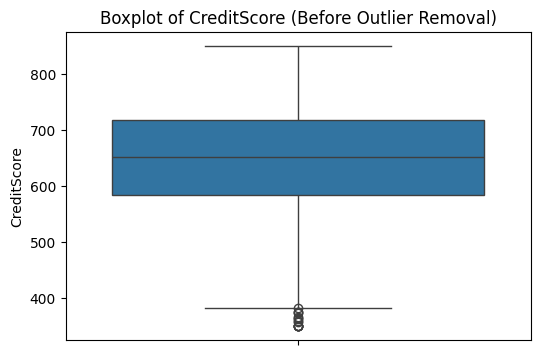

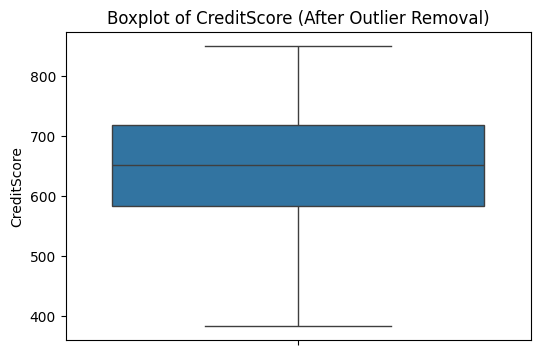

Processing column: Age



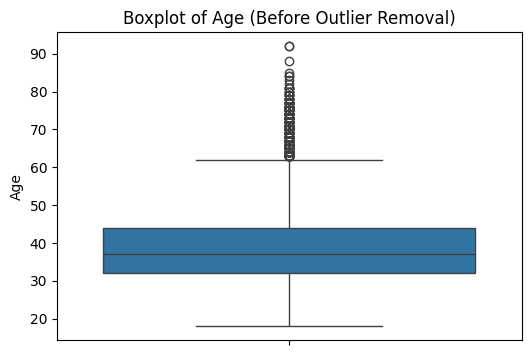

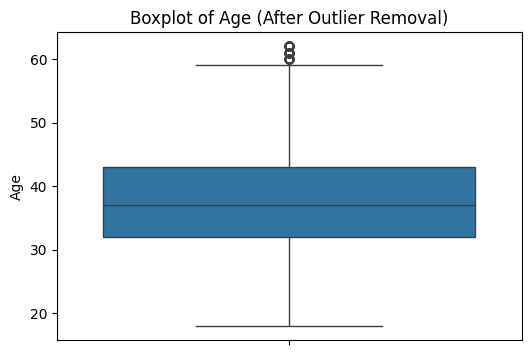

Processing column: Tenure



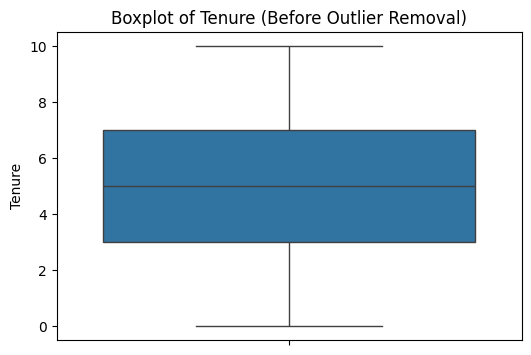

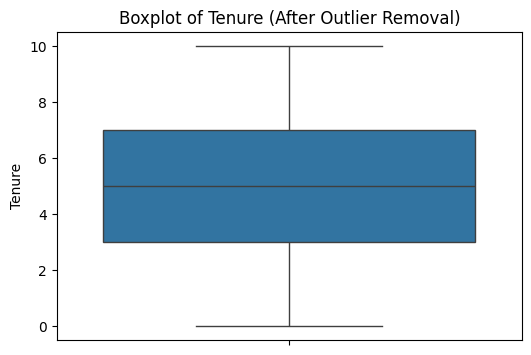

Processing column: Balance



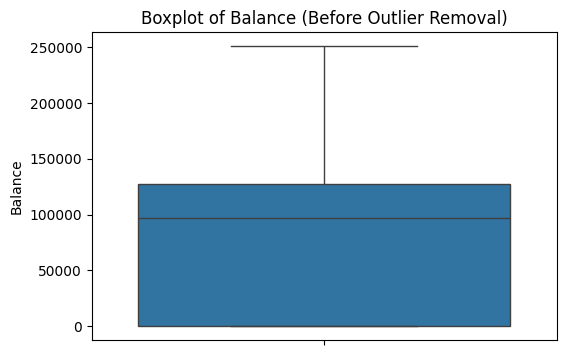

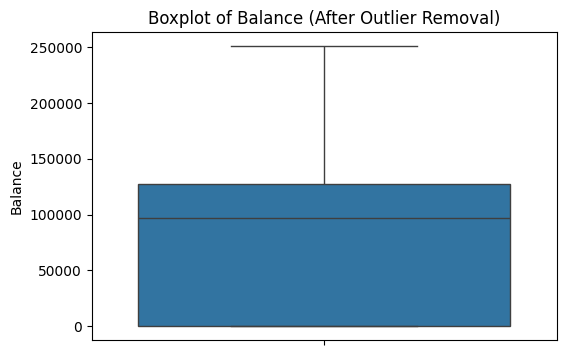

Processing column: NumOfProducts



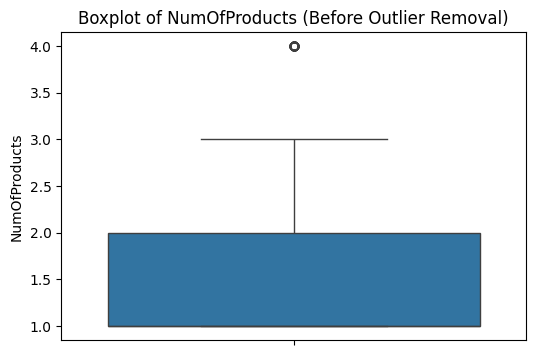

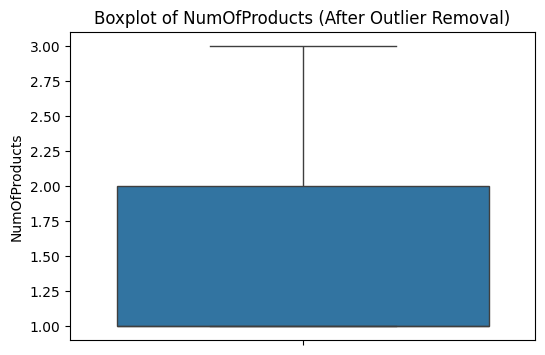

Processing column: HasCrCard



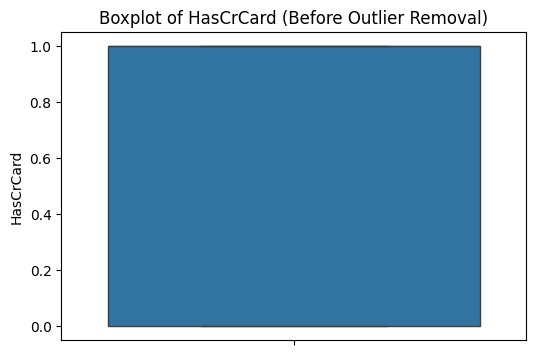

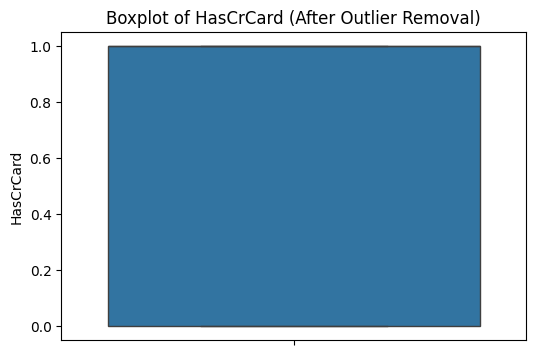

Processing column: IsActiveMember



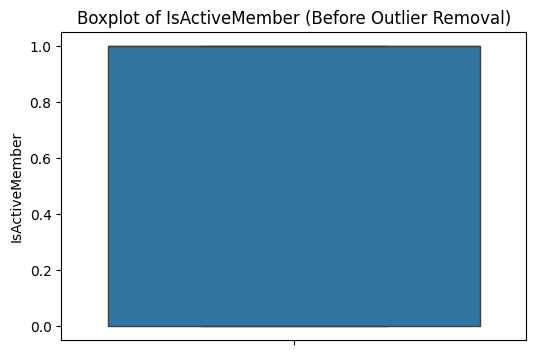

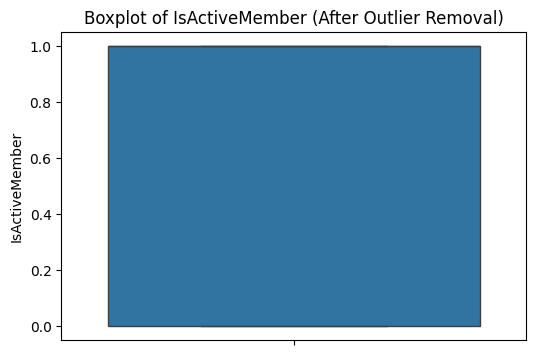

Processing column: EstimatedSalary



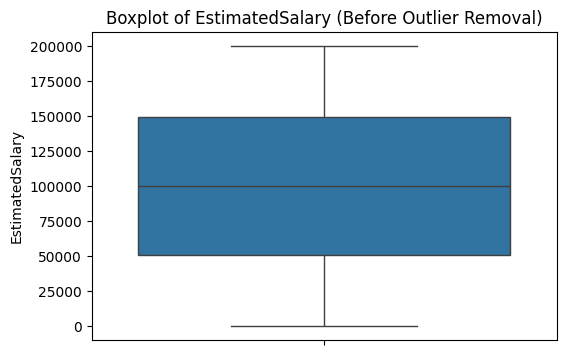

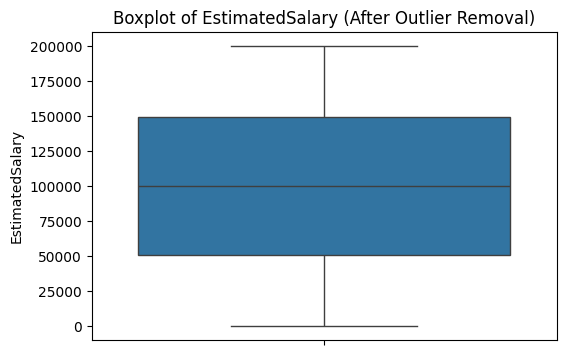

Processing column: Complain



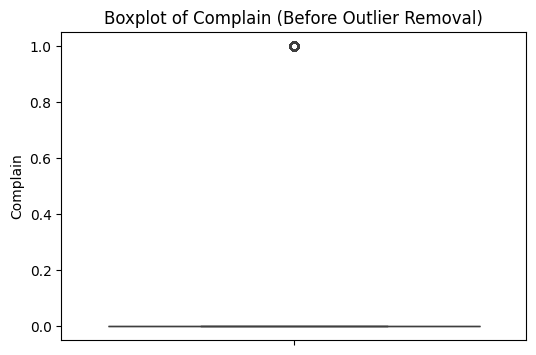

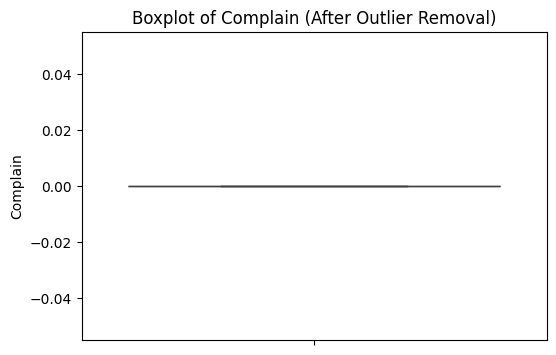

Processing column: Satisfaction Score



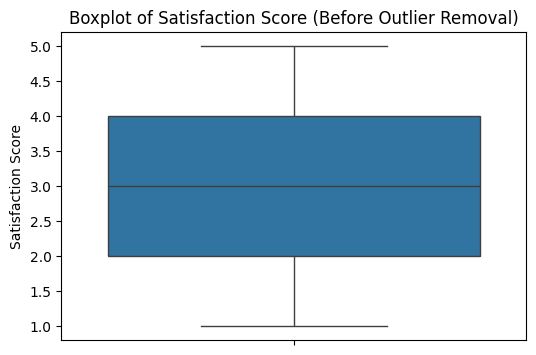

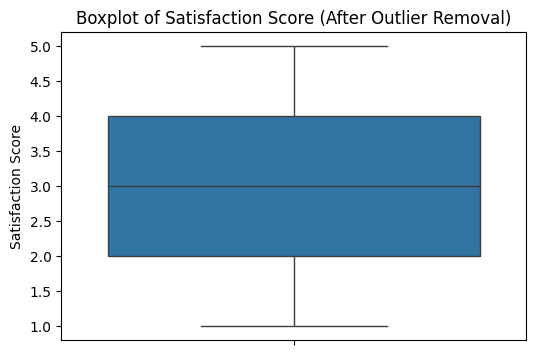

Processing column: Point Earned



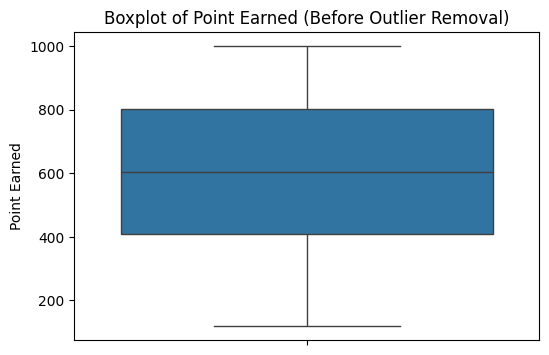

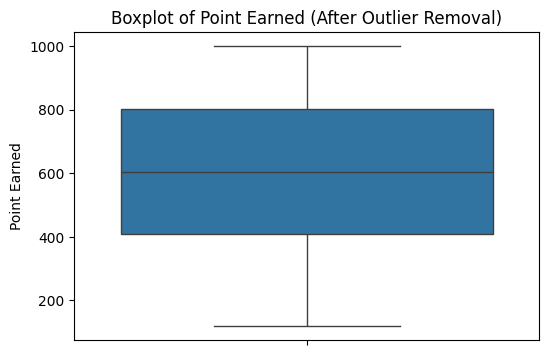

Comparison of Model Performance Before and After Outlier Removal:
CreditScore: {'SVM Before': 0.805, 'RF Before': 0.803, 'SVM After': 0.7801702553830746, 'RF After': 0.7771657486229344}
Age: {'SVM Before': 0.8125, 'RF Before': 0.811, 'SVM After': 0.7988595127008813, 'RF After': 0.800414722654225}
Tenure: {'SVM Before': 0.8035, 'RF Before': 0.8035, 'SVM After': 0.8035, 'RF After': 0.8035}
Balance: {'SVM Before': 0.8035, 'RF Before': 0.733, 'SVM After': 0.8035, 'RF After': 0.7335}
NumOfProducts: {'SVM Before': 0.8235, 'RF Before': 0.8235, 'SVM After': 0.8113682092555332, 'RF After': 0.8113682092555332}
HasCrCard: {'SVM Before': 0.8035, 'RF Before': 0.8035, 'SVM After': 0.8035, 'RF After': 0.8035}
IsActiveMember: {'SVM Before': 0.8035, 'RF Before': 0.8035, 'SVM After': 0.8035, 'RF After': 0.8035}
EstimatedSalary: {'SVM Before': 0.8035, 'RF Before': 0.6865, 'SVM After': 0.8035, 'RF After': 0.686}
Complain: {'SVM Before': 0.999, 'RF Before': 0.999, 'SVM After': 0.9993718592964824, 'RF After

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
file_path = "/content/Bank-Customer-Attrition-Insights-Data[1].csv"

# Read data
df = pd.read_csv(file_path)

# Select numerical columns excluding non-relevant ones
num_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col not in ["RowNumber", "CustomerId", "Exited"]]

# Function to detect and remove outliers
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Prepare output dictionary
results = {}

# Iterate through each numerical column
for col in num_cols:
    print(f"Processing column: {col}\n")

    # Boxplot before outlier removal
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col} (Before Outlier Removal)')
    plt.show()

    # Remove outliers
    df_cleaned = remove_outliers(df, col)

    # Boxplot after outlier removal
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df_cleaned[col])
    plt.title(f'Boxplot of {col} (After Outlier Removal)')
    plt.show()

    # Define features and target
    X = df[[col]]
    y = df['Exited']

    X_cleaned = df_cleaned[[col]]
    y_cleaned = df_cleaned['Exited']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

    # Train SVM & RF models before outlier removal
    svm = SVC()
    rf = RandomForestClassifier()

    svm.fit(X_train, y_train)
    rf.fit(X_train, y_train)

    y_pred_svm = svm.predict(X_test)
    y_pred_rf = rf.predict(X_test)

    acc_svm_before = accuracy_score(y_test, y_pred_svm)
    acc_rf_before = accuracy_score(y_test, y_pred_rf)

    # Train SVM & RF models after outlier removal
    svm.fit(X_train_cleaned, y_train_cleaned)
    rf.fit(X_train_cleaned, y_train_cleaned)

    y_pred_svm_cleaned = svm.predict(X_test_cleaned)
    y_pred_rf_cleaned = rf.predict(X_test_cleaned)

    acc_svm_after = accuracy_score(y_test_cleaned, y_pred_svm_cleaned)
    acc_rf_after = accuracy_score(y_test_cleaned, y_pred_rf_cleaned)

    # Store results
    results[col] = {
        "SVM Before": acc_svm_before,
        "RF Before": acc_rf_before,
        "SVM After": acc_svm_after,
        "RF After": acc_rf_after
    }

# Print final results
print("Comparison of Model Performance Before and After Outlier Removal:")
for col, res in results.items():
    print(f"{col}: {res}")